## Assignment-16_Neural Network _ Gasturbines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the csv file and having a glance at the data
Turbine_data = pd.read_csv("gas_turbines.csv")
Turbine_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### Making necessary EDA for the model

In [3]:
#Checking the rows and columns of the data
Turbine_data.shape

(15039, 11)

In [4]:
#Looking into datatypes and null values of the data
Turbine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
#Checking for the duplicate values
Turbine_data[Turbine_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


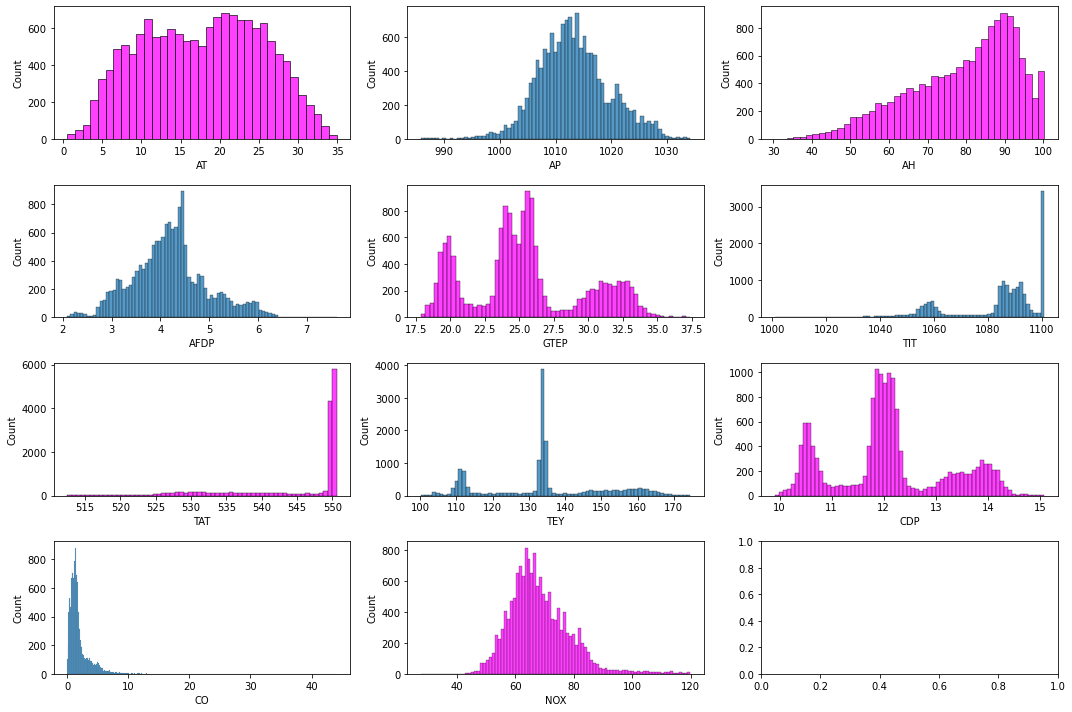

In [6]:
#Checking for the outliers using the box plot
fig, ax = plt.subplots(4, 3, figsize=(15,10))

sns.histplot(Turbine_data.AT, ax=ax[0,0],color='magenta')
sns.histplot(Turbine_data.AP, ax=ax[0,1])
sns.histplot(Turbine_data.AH, ax=ax[0,2],color='magenta')

sns.histplot(Turbine_data.AFDP, ax=ax[1,0])
sns.histplot(Turbine_data.GTEP, ax=ax[1,1],color='magenta')
sns.histplot(Turbine_data.TIT, ax=ax[1,2])

sns.histplot(Turbine_data.TAT, ax=ax[2,0],color='magenta')
sns.histplot(Turbine_data.TEY, ax=ax[2,1])
sns.histplot(Turbine_data.CDP, ax=ax[2,2],color='magenta')

sns.histplot(Turbine_data.CO, ax=ax[3,0])
sns.histplot(Turbine_data.NOX, ax=ax[3,1],color='magenta')

plt.tight_layout()
plt.show()

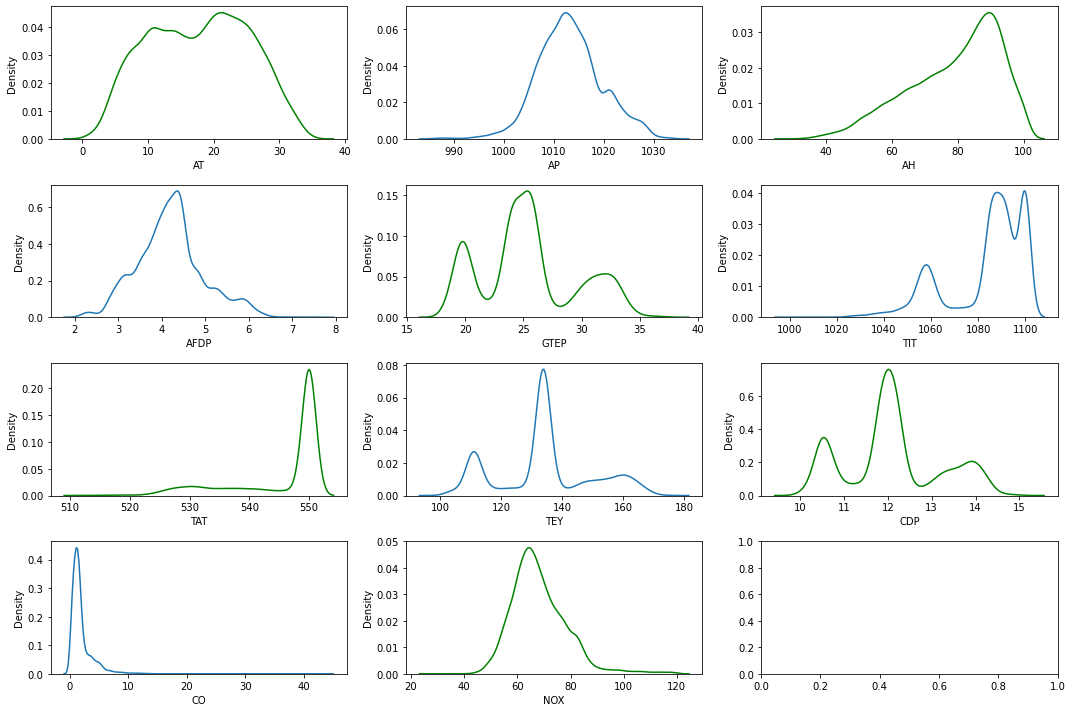

In [7]:
#Checking if the data is normally distributed or not
fig, ax = plt.subplots(4, 3, figsize=(15,10))

sns.kdeplot(Turbine_data.AT, ax=ax[0,0],color='g')
sns.kdeplot(Turbine_data.AP, ax=ax[0,1])
sns.kdeplot(Turbine_data.AH, ax=ax[0,2],color='g')

sns.kdeplot(Turbine_data.AFDP, ax=ax[1,0])
sns.kdeplot(Turbine_data.GTEP, ax=ax[1,1],color='g')
sns.kdeplot(Turbine_data.TIT, ax=ax[1,2])

sns.kdeplot(Turbine_data.TAT, ax=ax[2,0],color='g')
sns.kdeplot(Turbine_data.TEY, ax=ax[2,1])
sns.kdeplot(Turbine_data.CDP, ax=ax[2,2],color='g')

sns.kdeplot(Turbine_data.CO, ax=ax[3,0])
sns.kdeplot(Turbine_data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

In [8]:
#Label Encoding the data
from sklearn.preprocessing import LabelEncoder
Turbine_data1=Turbine_data.apply(LabelEncoder().fit_transform)
Turbine_data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,707,461,10695,10885
1,1199,297,12149,2207,842,293,2285,709,454,10775,10892
2,1251,301,11882,2148,883,294,2272,708,457,10746,10835
3,1334,305,11699,2138,892,296,2284,709,462,10738,10875
4,1505,310,11676,2197,871,297,2283,709,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,491,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,508,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,352,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,406,389,12579,11636


In [9]:
#Dropping the TEY column
Turbine_data1['Tey_New']=pd.cut(Turbine_data1.TEY,bins=[0,1739,4206],labels=[0,1])
Turbine_data2=Turbine_data1.drop(['TEY'],axis=1)
Turbine_data2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Tey_New
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0


In [10]:
df= Turbine_data2.values
df

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]], dtype=int64)

In [11]:
#Assigning dependent and independent values
x = df[:,0:10]
y = df[:,10]

In [12]:
#Performing the train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33)

In [13]:
#Building a Sequential neural network with 32 neurons in the first layer,10 neurons in the hidden layer and 1 neuron in the output layer
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [14]:
#Compiling the model and using binary cross entropy as the loss function and adam as the weight optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [15]:
#Fitting the model
history = model.fit(x, y,validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 3s 2ms/step - loss: 0.3958 - acc: 0.7569 - val_loss: -8745442472886272.0000 - val_acc: 0.8382
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3479 - acc: 0.7929 - val_loss: -17335273985671168.0000 - val_acc: 0.8344
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3175 - acc: 0.8218 - val_loss: -10777910117924864.0000 - val_acc: 0.8541
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3070 - acc: 0.8372 - val_loss: -19758612645675008.0000 - val_acc: 0.8517
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2936 - acc: 0.8444 - val_loss: -14342639558066176.0000 - val_acc: 0.8666
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2855 - acc: 0.8521 - val_loss: -14527798819422208.0000 - val_acc: 0.8372
Epoch 7/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2806 - acc

Epoch 55/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2410 - acc: 0.8824 - val_loss: -42166558688018432.0000 - val_acc: 0.8847
Epoch 56/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2410 - acc: 0.8851 - val_loss: -24917078821568512.0000 - val_acc: 0.8870
Epoch 57/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2405 - acc: 0.8821 - val_loss: -28401757587505152.0000 - val_acc: 0.8845
Epoch 58/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2397 - acc: 0.8847 - val_loss: -35449030121095168.0000 - val_acc: 0.8837
Epoch 59/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2419 - acc: 0.8813 - val_loss: -42027238538870784.0000 - val_acc: 0.8880
Epoch 60/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2408 - acc: 0.8841 - val_loss: -29906127864987648.0000 - val_acc: 0.8888
Epoch 61/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.24

In [16]:
#Checking for the loss function and accuracy 
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -52590525919789056.0000 - acc: 0.8929
acc: 89.29%


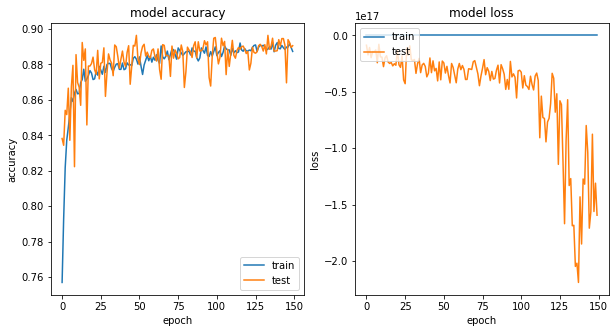

In [17]:
#Visualizing the model accuracy and model loss wrt train and test data
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Insights drawn:

From both the plots it depicts that the neural network created has the accuracy of 89.29% with low loss. Hence the model classifies well for gas turbine features